# Project 3

### 3. MovieLens dataset

##### Question 1

In [1]:
import numpy as np
import pandas as pd

ratings = pd.read_csv('ratings.csv',quotechar='"')
movies = pd.read_csv('movies.csv',quotechar='"')
print(ratings.shape)
print(movies.shape)
print("Sparsity=",ratings.shape[0]/(ratings.loc[ratings.shape[0]-1,'userId']*movies.shape[0]))

(100004, 4)
(9125, 3)
Sparsity= 0.01633285017250883


##### Question 2

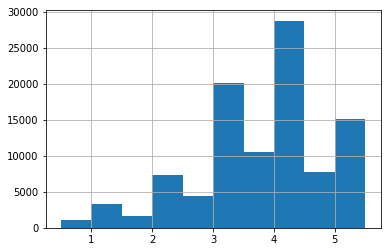

In [3]:
ratings.rating.hist(bins=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])

##### Problem 3

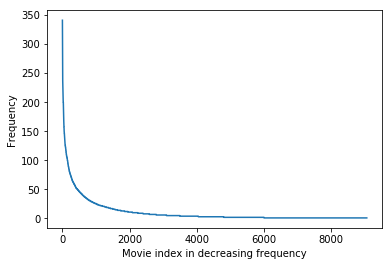

In [4]:
import matplotlib.pyplot as plt
moviefreq = {}
for mid in ratings.movieId:
    if mid in moviefreq:
        moviefreq[mid] += 1
    else:
        moviefreq[mid] = 1
moviefreq = dict(sorted(moviefreq.items(),key=lambda item:item[1],reverse=True))
plt.figure()
plt.plot(range(len(moviefreq)),moviefreq.values())
plt.ylabel('Frequency')
plt.xlabel('Movie index in decreasing frequency')
plt.show()

##### Problem 4

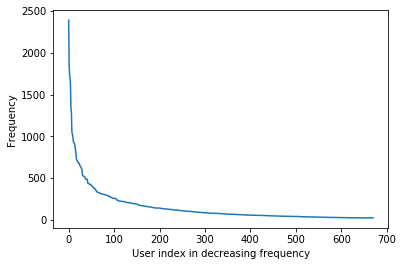

In [5]:
userfreq = {}
for uid in ratings.userId:
    if uid in userfreq:
        userfreq[uid] += 1
    else:
        userfreq[uid] = 1
userfreq = dict(sorted(userfreq.items(),key=lambda item:item[1],reverse=True))
plt.figure()
plt.plot(range(len(userfreq)),userfreq.values())
plt.ylabel('Frequency')
plt.xlabel('User index in decreasing frequency')
plt.show()

##### Problem 5
Written on Report

##### Problem 6

minimum var= 0.0
maximum var= 5.0625


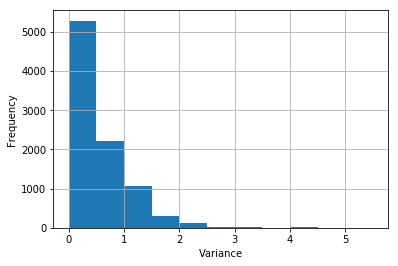

In [6]:
R = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating', fill_value=0).values
var = list()
for i in range(R.shape[1]):
    data = list()
    for r in R[:,i]:
        if r != 0:
            data.append(r)
    var.append(np.var(data))
print('minimum var=', min(var))
print('maximum var=', max(var))
plt.figure()
plt.hist(var,bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
plt.grid('on')
plt.ylabel('Frequency')
plt.xlabel('Variance')
plt.show()

### 4. Neighborhood-based collaborative filtering

In [22]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise import accuracy

##### Problem 10

In [9]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)

sim_options = {'name': 'pearson'}
avg_rmses_p10 = []
avg_maes_p10 = []
for k in range(2,102,2):
    algo = KNNWithMeans(k=k, sim_options=sim_options)
    output = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10)
    avg_rmses_p10.append(np.mean(output['test_rmse']))
    avg_maes_p10.append(np.mean(output['test_mae']))

Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity 

Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done com

Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity 

Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.

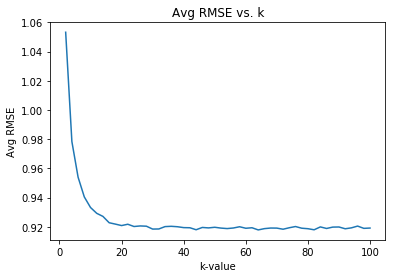

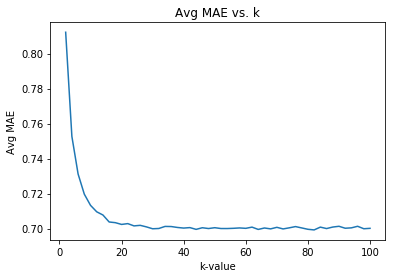

In [21]:
plt.figure()
plt.title("Avg RMSE vs. k")
plt.ylabel("Avg RMSE")
plt.xlabel("k-value")
plt.plot(range(2,102,2), avg_rmses_p10)
plt.show()

plt.figure()
plt.title("Avg MAE vs. k")
plt.ylabel("Avg MAE")
plt.xlabel("k-value")
plt.plot(range(2,102,2), avg_maes_p10)
plt.show()

##### Question 11

K=20

##### Question 12
Popular(more than 2 ratings)

In [11]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
kf = KFold(n_splits=10)

sim_options = {'name': 'pearson'}
avg_rmses_p12 = list()
for k in range(2,102,2):
    algo = KNNWithMeans(k=k, sim_options=sim_options)
    rmses = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        testset = pd.DataFrame(testset, columns=['userId','movieId','rating'])
        testset = testset.groupby('movieId').filter(lambda x: len(x)>2)
        testset = np.array(testset).tolist()
        predictions = algo.test(testset)
        rmses.append(accuracy.rmse(predictions, verbose=False))
    avg_rmses_p12.append(np.mean(rmses))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

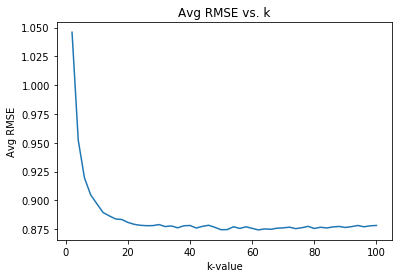

In [12]:
plt.figure()
plt.title("Avg RMSE vs. k")
plt.ylabel("Avg RMSE")
plt.xlabel("k-value")
plt.plot(range(2,102,2), avg_rmses_p12)
plt.show()

##### Problem 13
Unpopular(less than or equal to 2 ratings)

In [13]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
kf = KFold(n_splits=10)

sim_options = {'name': 'pearson'}
avg_rmses_p13 = list()
for k in range(2,102,2):
    algo = KNNWithMeans(k=k, sim_options=sim_options)
    rmses = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        testset = pd.DataFrame(testset, columns=['userId','movieId','rating'])
        testset = testset.groupby('movieId').filter(lambda x: len(x)<=2)
        testset = np.array(testset).tolist()
        predictions = algo.test(testset)
        rmses.append(accuracy.rmse(predictions, verbose=False))
    avg_rmses_p13.append(np.mean(rmses))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

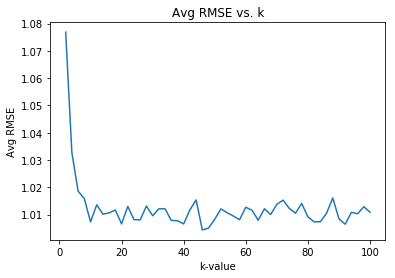

In [14]:
plt.figure()
plt.title("Avg RMSE vs. k")
plt.ylabel("Avg RMSE")
plt.xlabel("k-value")
plt.plot(range(2,102,2), avg_rmses_p13)
plt.show()

##### Problem 14
High Variance (var at least 2 and more than 5 ratings)

In [15]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
kf = KFold(n_splits=10)

sim_options = {'name': 'pearson'}
avg_rmses_p14 = list()
for k in range(2,102,2):
    algo = KNNWithMeans(k=k, sim_options=sim_options)
    rmses = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        testset = pd.DataFrame(testset, columns=['userId','movieId','rating'])
        testset = testset.groupby('movieId').filter(lambda x: len(x)>5 and np.var(x['rating'])>=2)
        testset = np.array(testset).tolist()
        predictions = algo.test(testset)
        rmses.append(accuracy.rmse(predictions, verbose=False))
    avg_rmses_p14.append(np.mean(rmses))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

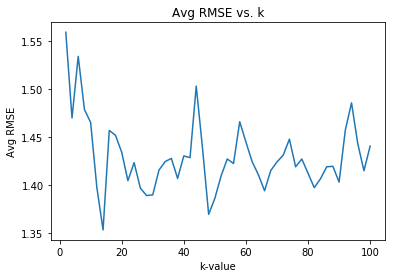

In [43]:
plt.figure()
plt.title("Avg RMSE vs. k")
plt.ylabel("Avg RMSE")
plt.xlabel("k-value")
plt.plot(range(2,102,2), avg_rmses_p14)
plt.show()

##### Problem 15

Computing the pearson similarity matrix...
Done computing similarity matrix.


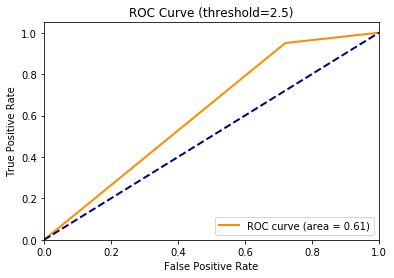

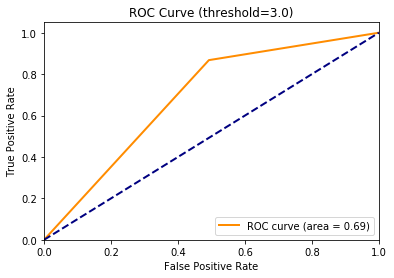

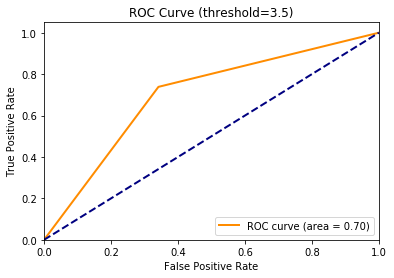

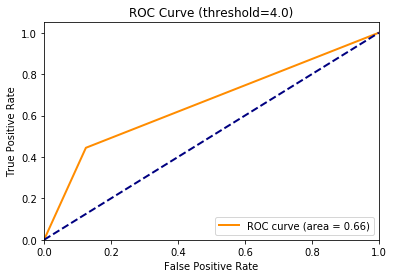

In [42]:
from sklearn.metrics import roc_curve, auc
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
trainset,testset = train_test_split(data,test_size=0.1)
algo = KNNWithMeans(k=16, sim_options=sim_options)
algo.fit(trainset)
prediction = algo.test(testset)
for threshold in [2.5,3,3.5,4]:
    true = list()
    predict = list()
    for uid, mid, actual, est, misc in prediction:
        if actual >= threshold:
            true.append(1)
        else:
            true.append(0)
        if est >= threshold:
            predict.append(1)
        else:
            predict.append(0)
        #predict.append(est)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(true, predict)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (threshold=%.1f)' % threshold)
    plt.legend(loc="lower right")
    plt.show()

### 5. Model-based collaborative filtering

##### Problem 17

In [ ]:
from surprise import NMF
